In [21]:
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets

np.random.seed(42)

In [22]:
def plotStats(stats):
    plt.figure(figsize=(12, 6))
    t = np.arange(0, len(stats))
    plt.plot(t, stats[:,0], 'r-d', label="Wolfs")
    plt.plot(t, stats[:,1], 'b-o', label="Rabbits")
    plt.xlabel('Iterations')
    #plt.xticks(np.arange(0, len(stats)))
    plt.legend()
    plt.grid()
    plt.show()

In [23]:
#def plotWorld(H, L):
def plotWorld(i, pop):
    L = pop[i][0]
    H = pop[i][1]
    if (len(L) > 0):
        plt.scatter(L[:, 0] -.5, L[:, 1]-.5, c='r', s=100, marker='d', label="Wolfs")
    if (len(H) > 0):
        plt.scatter(H[:, 0] -.5, H[:, 1] -.5, c='b', label="Rabbits")
    plt.xticks(np.arange(0, N))
    plt.yticks(np.arange(0, N))    
    plt.grid()
    plt.show()

In [40]:
def plotLH(stats):
    plt.plot(stats[:,0], stats[:,1])
    plt.xlabel("Wolfs")
    plt.ylabel("Rabbits")
    plt.show()

In [24]:
# Predator and prey movement    
def moveL(L): 
    return (L + np.round(np.random.uniform(-3, 3, size=L.shape))) % N

def moveH(H): 
    return (H + np.round(np.random.uniform(-2, 2, size=H.shape))) % N
    
# Repoduction
def reproduce(P, prob):
    for i in range(len(P)):
        if (np.random.uniform(0, 1) <= prob):
            #P = np.vstack((P, [P[i]]))            
            P = np.vstack((P, np.random.randint(N, size=2)))
    return P

# Death prey
def death(P, prob):
    rp = []
    for i in range(len(P)):
        if (np.random.uniform(0, 1) <= prob):
            rp.append(i)
    return np.delete(P, rp, axis=0)

# Check if wolf eats
def checkFood(L, H, d, probEat, probRep):
    for l in L: # Foreach wolf
        pos = 0 
        for h in H: # Foreach rabbit
            # If rabbit is inside a wolf neighborhood
            if np.linalg.norm(l-h, ord=1) <= d: 
                if (np.random.uniform(0, 1) <= probEat): # Random eat
                    H = np.delete(H, [pos], axis=0) # Remove rabbit
                    
                    # Reproduce wolf if it eats
                    if (np.random.uniform(0, 1) <= probRep):
                        L = np.vstack((L, [l]))
            pos += 1 # pos to handle the rabbits' removal
    return L, H

In [25]:
# Parameters
N = 40 # World size
Prc = 1e-1 # Probability of rabbit's reproduction or birth
Pdl = 8e-2 # Probability of wolf's death
Prl = 4e-1 # Probability of wolf's reproduction or birth
Pcl = 5e-1 # Probability of wolf's feeding
d = 2 # Distance for wolf eating

NL = 20 # Number of wolfs
NH = 55 # Number of rabbits

# Iterations
N_iter = 1000    

In [41]:
def simulation(N, NL, NH, Prc, Pdl, Prl, Pcl, d, N_iter):
    # Random wolfs and rabbits positions
    L = np.random.randint(N, size=(NL, 2))
    H = np.random.randint(N, size=(NH, 2))
    
    stats = [[NL, NH]]
    pop = []
    
    for i in range(1, N_iter + 1):
        L = moveL(L) # Move wolfs
        H = moveH(H) # Move rabbits
        H = reproduce(H, Prc) # Reproduce rabbits
        L, H = checkFood(L, H, d, Pcl, Prl) # Wolfs eat rabbits
        L = death(L, Pdl) # Wolfs death after time

        # Append stats
        stats.append([len(L), len(H)])
        pop.append([L, H])

        # Show world status
        #plotWorld(H, L)

        # Stop iterations 
        if (len(H) >= 0 and len(L) == 0):
            break
            
    return np.array(pop), np.array(stats)

In [42]:
pop, stats = simulation(N, NL, NH, Prc, Pdl, Prl, Pcl, d, N_iter)

/home/dsanmartin/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:32: DeprecationWarning: in the future out of bounds indices will raise an error instead of being ignored by `numpy.delete`.


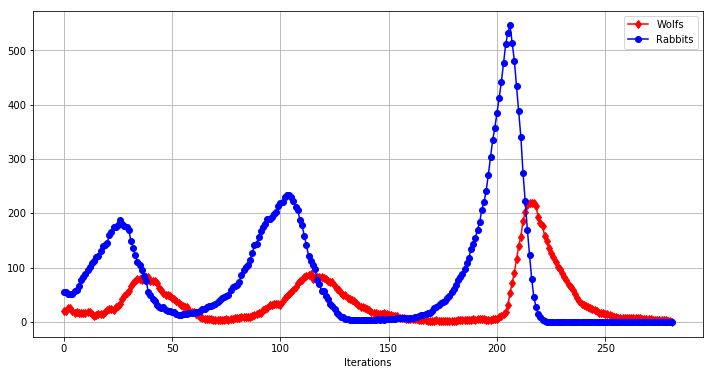

In [43]:
# Show stats
plotStats(np.array(stats))

In [66]:
def sim(N=40, NL=20, NH=55, Prc=1e-1, Pdl=8e-2, Prl=4e-1, Pcl=5e-1, d=2, N_iter=100):
    sN = widgets.IntSlider(value=N, min=0, max=100, step=1, description='N:')#, continuous_update=False, 
                               #readout=True, readout_format='d')
    sNL = widgets.IntSlider(value=NL, min=0, max=100, step=1, description='Initial Wolfs:')#, continuous_update=False, 
                               #readout=True, readout_format='d')
    sNH = widgets.IntSlider(value=NH, min=0, max=100, step=1, description='Initial Rabbits:')#, continuous_update=False, 
                               #readout=True, readout_format='d')
    sPrc = widgets.FloatSlider(value=Prc, min=0, max=1, step=0.01, description="Reproduccion Conejo")
    sPdl = widgets.FloatSlider(value=Pdl, min=0, max=1, step=0.01, description="Muerte Lobo")
    sPrl = widgets.FloatSlider(value=Prl, min=0, max=1, step=0.01, description="Reproduccion Lobo")
    sPcl = widgets.FloatSlider(value=Pcl, min=0, max=1, step=0.01, description="Caza Conejo")
    sd = widgets.IntSlider(value=d, min=0, max=5, step=1, description='Hunting distance:')
    sNit = widgets.IntSlider(value=N_iter, min=100, max=1000, step=100, description='Iteraciones:')
    
    out = widgets.interact(simulation, N=sN, NL=sNL, NH=sNH, Prc=sPrc, Pdl=sPdl, Prl=sPrl, Pcl=sPcl, d=sd, N_iter=sNit)
    pop = out[0]
    stats = out[1]
    
    plotWorlds()

In [67]:
sim()

interactive(children=(IntSlider(value=40, description='N:'), IntSlider(value=20, description='Initial Wolfs:'), IntSlider(value=55, description='Initial Rabbits:'), FloatSlider(value=0.1, description='Reproduccion Conejo', max=1.0, step=0.01), FloatSlider(value=0.08, description='Muerte Lobo', max=1.0, step=0.01), FloatSlider(value=0.4, description='Reproduccion Lobo', max=1.0, step=0.01), FloatSlider(value=0.5, description='Caza Conejo', max=1.0, step=0.01), IntSlider(value=2, description='Hunting distance:', max=5), IntSlider(value=100, description='Iteraciones:', max=1000, min=100, step=100), Output()), _dom_classes=('widget-interact',))

TypeError: 'function' object is not subscriptable

In [65]:
def plotWorlds(i=0):
    slider = widgets.IntSlider(value=0, min=0, max=len(pop)-1, step=1, description='Time step:', 
                               continuous_update=False, readout=True, readout_format='d')
    
    widgets.interact(plotWorld, pop=widgets.fixed(pop), i=slider)

In [51]:
plotWorlds()

interactive(children=(IntSlider(value=0, continuous_update=False, description='Time step:', max=355), Output()), _dom_classes=('widget-interact',))

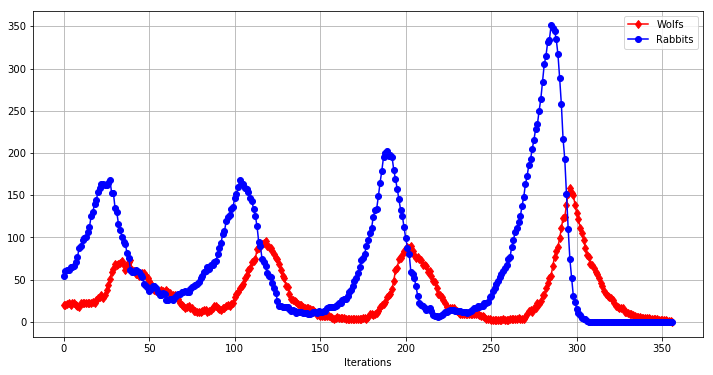

In [52]:
plotStats(np.array(stats))

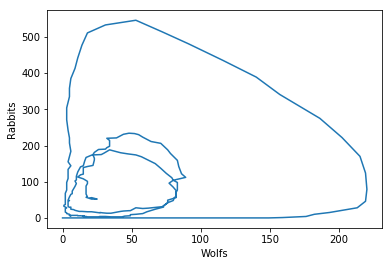

In [44]:
plotLH(stats)